# Comparison of different Classification algorithms and parameters
In this notebook, plots will be created to compare the classification algorithms OVO and OVA.
Furthermore, the thresholds for those algorithms will be examined.
The results for the zymoMock dataset with kraken 2 and DIAMER with the uniform11s alphabet and a k-mer length of 13

In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from util import *

# set path to data folder
root = "F:/Studium/Master/semester5/thesis/data/dataset/"

# definition of the true positive species
species = {
    "Pseudomonas aeruginosa",
    "Escherichia coli",
    "Salmonella enterica",
    "Staphylococcus aureus",
    "Limosilactobacillus fermentum",
    "Enterococcus faecalis",
    "Listeria monocytogenes",
    "Bacillus subtilis",
    "Saccharomyces cerevisiae",
    "Cryptococcus neoformans"}

# total read count in zymoMock dataset
total = 1_160_526
# reading the taxonomic tree
tree = Tree(root + "tree_nr.txt")
# generate dictionary with all taxa that are true positives for each taxonomic rank
true_taxons = get_true_taxons_for_all_ranks(tree, species)

In [21]:
# reading in kraken2 and DIAMER results
data_kraken = read_per_taxon_assignment(root + "zymo_mock/assignment_kraken2x_nr/per_taxon_assignments.tsv")
data_diamer = read_per_taxon_assignment(root + "zymo_mock/assignment_nr90_uniform11s_13-mer/per_taxon_assignments.tsv")

# add column with labels for the true positives
data_kraken = classify_assigned_taxa(data_kraken, true_taxons)
data_diamer = classify_assigned_taxa(data_diamer, true_taxons)

# transform algorithm columns into one column with algorithm, parameter and used data
data_kraken = extract_algorithm_info(data_kraken)
data_diamer = extract_algorithm_info(data_diamer)

# calculate the precision and recall for each algorithm-parameter-data combination and each rank
data_diamer = get_precision_recall_reads(data_diamer, total)
data_kraken = get_precision_recall_reads(data_kraken, total)

data_diamer

true positive,algorithm,algorithm data,algorithm parameter,rank,false positive,true positive,precision,recall
1,OVA,kmer count,0.1,class,973.0,37708.0,0.974846,0.032492
3,OVA,kmer count,0.1,family,1003.0,130345.0,0.992364,0.112315
6,OVA,kmer count,0.1,genus,8972.0,251103.0,0.965502,0.216370
10,OVA,kmer count,0.1,kingdom,22.0,37840.0,0.999419,0.032606
12,OVA,kmer count,0.1,order,524.0,16679.0,0.969540,0.014372
...,...,...,...,...,...,...,...,...
2775,OVO,norm. kmer count (cumulative),1.0,kingdom,7214.0,1073182.0,0.993323,0.924738
2777,OVO,norm. kmer count (cumulative),1.0,order,79890.0,920683.0,0.920156,0.793333
2779,OVO,norm. kmer count (cumulative),1.0,phylum,63428.0,997003.0,0.940187,0.859096
2783,OVO,norm. kmer count (cumulative),1.0,species,140403.0,456048.0,0.764603,0.392967


In [22]:
# filter for species data only
rank = "species"
data_kraken_filtered = data_kraken[(data_kraken["rank"] == rank)]
data_diamer_filtered = data_diamer[(data_diamer["rank"] == rank)]

C:\Users\nk035\AppData\Local\Temp\ipykernel_24564\3502887422.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i, row in data_kraken_filtered[(data_kraken["algorithm"] == "OVO") & (data_kraken["algorithm data"] == "read count (cumulative)")].iterrows():


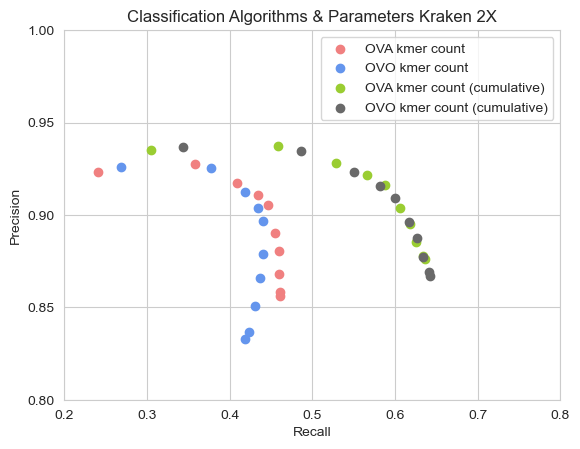

In [23]:
# plot algorithm performances for kraken2
colors = ["lightcoral", "cornflowerblue", "yellowgreen", "dimgrey", "gold", "lightseagreen", "forestgreen", "plum"]
for i, data in enumerate(data_kraken_filtered["algorithm data"].unique()):
    data_ova = data_kraken_filtered[(data_kraken_filtered["algorithm data"] == data) & (data_kraken_filtered["algorithm"] == "OVA")]
    data_ovo = data_kraken_filtered[(data_kraken_filtered["algorithm data"] == data) & (data_kraken_filtered["algorithm"] == "OVO")]
    plt.scatter(data_ova["recall"], data_ova["precision"], label="OVA " + data, color=colors[i*2])
    plt.scatter(data_ovo["recall"], data_ovo["precision"], label="OVO " + data, color=colors[i*2 + 1])
# annotate one curve:
for i, row in data_kraken_filtered[(data_kraken["algorithm"] == "OVO") & (data_kraken["algorithm data"] == "read count (cumulative)")].iterrows():
    plt.annotate(
        row["algorithm parameter"],
        xy=(row["recall"], row["precision"]),
        xytext=(row["recall"] + 0.02, (row["precision"] + 0.005) if row["algorithm parameter"] != 1.0 else (row["precision"])),
        fontsize=8,
        color="black",
        ha="center",
        va="center")

plt.xlabel("Recall")
plt.xlim(0.2, 0.8)
plt.ylim(0.8, 1)
plt.yticks(np.arange(0.8, 1.01, 0.05))
plt.ylabel("Precision")
plt.title("Classification Algorithms & Parameters Kraken 2X")
plt.legend()
plt.show()

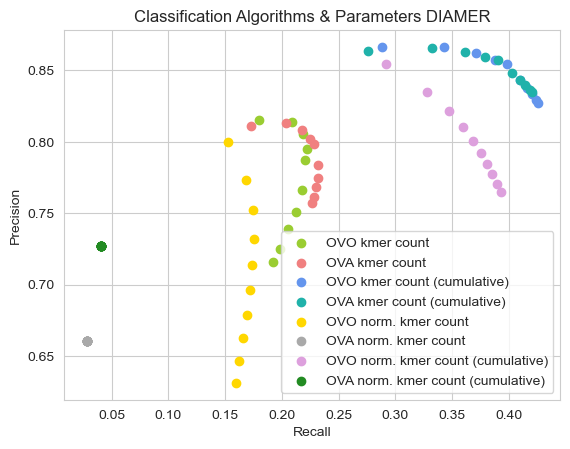

In [24]:
# plot algorithm performances for kraken2
colors = ["lightcoral", "yellowgreen", "lightseagreen", "cornflowerblue", "darkgrey", "gold", "forestgreen", "plum"]
for i, data in enumerate(data_diamer_filtered["algorithm data"].unique()):
    data_ovo = data_diamer_filtered[(data_diamer_filtered["algorithm data"] == data) & (data_diamer_filtered["algorithm"] == "OVO")]
    data_ova = data_diamer_filtered[(data_diamer_filtered["algorithm data"] == data) & (data_diamer_filtered["algorithm"] == "OVA")]
    plt.scatter(data_ovo["recall"], data_ovo["precision"], label="OVO " + data, color=colors[i*2 + 1])
    plt.scatter(data_ova["recall"], data_ova["precision"], label="OVA " + data, color=colors[i*2])

# annotate one curve:
for i, row in data_diamer_filtered[(data_diamer_filtered["algorithm"] == "OVO") & (data_diamer_filtered["algorithm data"] == "read count (norm. kmers)")].iterrows():
    plt.annotate(
        row["algorithm parameter"],
        xy=(row["recall"], row["precision"]),
        xytext=(row["recall"] - 0.02, row["precision"] + 0.005),
        fontsize=8,
        color="black",
        ha="center",
        va="center")

plt.xlabel("Recall")
# plt.xlim(0.2, 0.8)
# plt.ylim(0.8, 1)
plt.ylabel("Precision")
plt.title("Classification Algorithms & Parameters DIAMER")
plt.legend()
plt.show()

In [15]:
# for rank genus
rank = "genus"
data_kraken_filtered = data_kraken[(data_kraken["rank"] == rank)]
data_diamer_filtered = data_diamer[(data_diamer["rank"] == rank)]

C:\Users\nk035\AppData\Local\Temp\ipykernel_24564\1019044292.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i, row in data_kraken_filtered[(data_kraken["algorithm"] == "OVO") & (data_kraken["algorithm data"] == "read count cumulative")].iterrows():


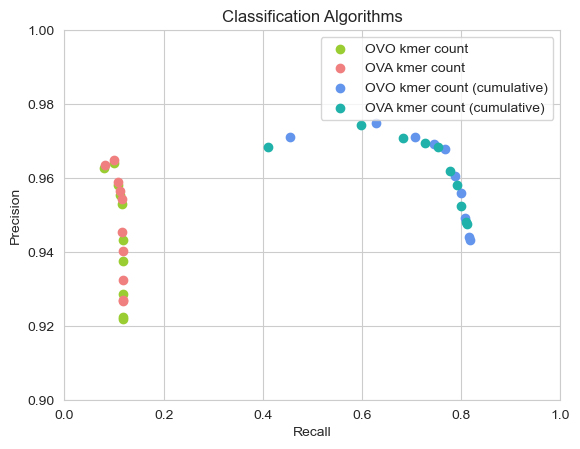

C:\Users\nk035\AppData\Local\Temp\ipykernel_24564\1019044292.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i, row in data_kraken_filtered[(data_kraken["algorithm"] == "OVO") & (data_kraken["algorithm data"] == "read count cumulative")].iterrows():


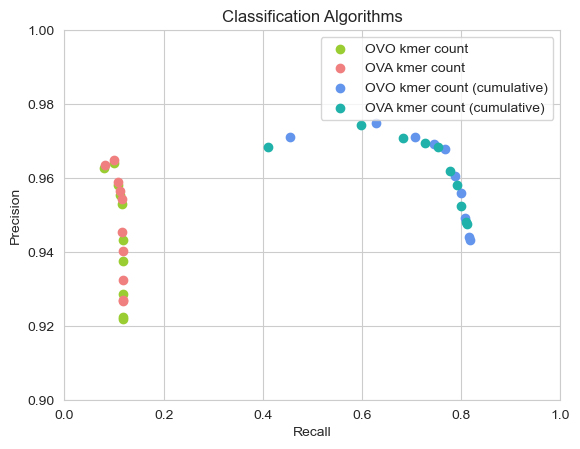

In [16]:
# plot algorithm performances for kraken2
colors = ["lightcoral", "yellowgreen", "lightseagreen", "cornflowerblue", "darkgrey", "gold", "forestgreen", "plum"]
for i, data in enumerate(data_kraken_filtered["algorithm data"].unique()):
    plt.scatter(
        data_kraken_filtered[(data_kraken_filtered["algorithm data"] == data) & (data_kraken_filtered["algorithm"] == "OVO")]["recall"],
        data_kraken_filtered[(data_kraken_filtered["algorithm data"] == data) & (data_kraken_filtered["algorithm"] == "OVO")]["precision"],
        label="OVO " + data, color=colors[i*2 + 1])
    plt.scatter(
        data_kraken_filtered[(data_kraken_filtered["algorithm data"] == data) & (data_kraken_filtered["algorithm"] == "OVA")]["recall"],
        data_kraken_filtered[(data_kraken_filtered["algorithm data"] == data) & (data_kraken_filtered["algorithm"] == "OVA")]["precision"],
        label="OVA " + data, color=colors[i*2])

# annotate one curve:
for i, row in data_kraken_filtered[(data_kraken["algorithm"] == "OVO") & (data_kraken["algorithm data"] == "read count cumulative")].iterrows():
    plt.annotate(
        row["algorithm parameter"],
        xy=(row["recall"], row["precision"]),
        xytext=(row["recall"] + 0.02, row["precision"] + 0.005),
        fontsize=8,
        color="black",
        ha="center",
        va="center")

plt.xlabel("Recall")
plt.xlim(0, 1)
plt.ylim(0.9, 1)
plt.ylabel("Precision")
plt.title("Classification Algorithms")
plt.legend()
plt.show()